In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [2]:
df=pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD002.txt', delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [3]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
df.columns=columns
df['max_time']=df.groupby('unit')['time'].transform('max')
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144,130


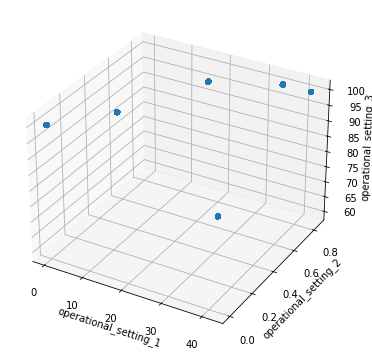

In [4]:

from mpl_toolkits.mplot3d import Axes3D
op1=df.iloc[:,2]
op2=df.iloc[:,3]
op3=df.iloc[:,4]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(op1, op2, op3)
ax.set_xlabel('operational_setting_1')
ax.set_ylabel('operational_setting_2')
ax.set_zlabel('operational_setting_3')
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8)
ax.tick_params(axis='z', pad=8)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'op3')

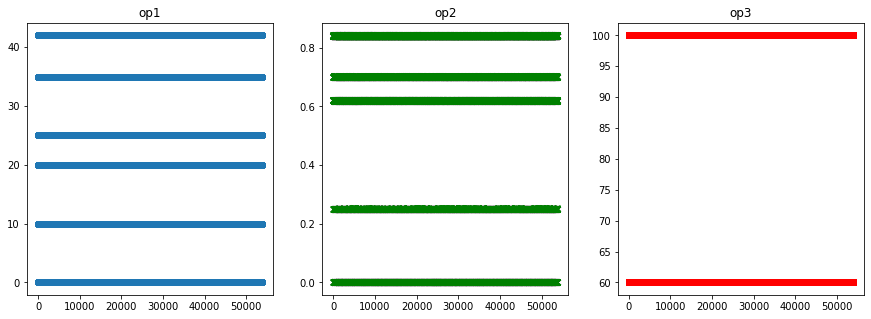

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df.index, df['op1'], marker='o', label='op1')
axs[0].set_title('op1')
axs[1].scatter(df.index, df['op2'], marker='x', label='op2', color='g')
axs[1].set_title('op2')
axs[2].scatter(df.index, df['op3'], marker='s', label='op3', color='r')
axs[2].set_title('op3')

In [6]:
# type1: op1 in [0,1], op2 in [0,1], op3 in [99,100]
# type2: op1 in [9,11], op2 in [0.2,0.3], op3 in [99, 100]
# type3: op1 in [19,21], op2 in [0.65, 0.75], op3 in [99, 100]
# type4: op1 in [24, 26], op2 in [0.6, 0.63], op3 in [59, 61]
# type5: op1 in [30, 40], op2 >=0.8, op3 in [99, 100]
# type6: op1 >=40, op2>=0.8, op3 in [99, 100]
df_ops=df[['op1','op2','op3']]
conditions = [
    (df['op1'].between(0, 1)) & (df['op2'].between(0, 1)) & (df['op3'].between(99, 100)),  # type1
    (df['op1'].between(9, 11)) & (df['op2'].between(0.2, 0.3)) & (df['op3'].between(99, 100)),  # type2
    (df['op1'].between(19, 21)) & (df['op2'].between(0.65, 0.75)) & (df['op3'].between(99, 100)),  # type3
    (df['op1'].between(24, 26)) & (df['op2'].between(0.6, 0.63)) & (df['op3'].between(59, 61)),  # type4
    (df['op1'].between(30, 40)) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100)),  # type5
    (df['op1'] >= 40) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100))  # type6
]
type_labels = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops['type'] = np.select(conditions, type_labels, default='undefined')
df_ops

C:\Users\owner\AppData\Local\Temp\ipykernel_36204\294332328.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['type'] = np.select(conditions, type_labels, default='undefined')


,op1,op2,op3,type
0,34.9983,0.8400,100.0,type5
1,41.9982,0.8408,100.0,type6
2,24.9988,0.6218,60.0,type4
3,42.0077,0.8416,100.0,type6
4,25.0005,0.6203,60.0,type4
...,...,...,...,...
53754,20.0037,0.7000,100.0,type3
53755,10.0022,0.2510,100.0,type2
53756,25.0041,0.6200,60.0,type4
53757,25.0033,0.6220,60.0,type4


In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
X_ops=ohe.fit_transform(df_ops[['type']])
X_ops 

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [8]:
column_names = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops = pd.DataFrame(X_ops, columns=column_names)
df_ops

,type1,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
53754,0.0,0.0,1.0,0.0,0.0,0.0
53755,0.0,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# Prevent multicollinearity
df_ops=df_ops.iloc[:,1:]
df_ops

,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
53754,0.0,1.0,0.0,0.0,0.0
53755,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,1.0,0.0,0.0


In [10]:
df=pd.concat([df, df_ops], axis=1)
df

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr20,sr21,max_time,remaining_time,label,type2,type3,type4,type5,type6
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,14.73,8.8071,149,148,130,0.0,0.0,0.0,1.0,0.0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,10.41,6.2665,149,147,130,0.0,0.0,0.0,0.0,1.0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,14.08,8.6723,149,146,130,0.0,0.0,1.0,0.0,0.0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,10.59,6.4701,149,145,130,0.0,0.0,0.0,0.0,1.0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,14.13,8.5286,149,144,130,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,24.36,14.5189,316,4,4,0.0,1.0,0.0,0.0,0.0
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,28.10,16.9454,316,3,3,1.0,0.0,0.0,0.0,0.0
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,14.19,8.5503,316,2,2,0.0,0.0,1.0,0.0,0.0
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,14.05,8.3729,316,1,1,0.0,0.0,1.0,0.0,0.0


In [11]:
window_size = 60

rolled_df = roll_time_series(
    df,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_df

Rolling: 100%|██████████| 54/54 [00:10<00:00,  5.29it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr21,max_time,remaining_time,label,type2,type3,type4,type5,type6,id
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8.8071,149,148,130,0.0,0.0,0.0,1.0,0.0,"(1, 60)"
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,6.2665,149,147,130,0.0,0.0,0.0,0.0,1.0,"(1, 60)"
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,8.6723,149,146,130,0.0,0.0,1.0,0.0,0.0,"(1, 60)"
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,6.4701,149,145,130,0.0,0.0,0.0,0.0,1.0,"(1, 60)"
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,8.5286,149,144,130,0.0,0.0,1.0,0.0,0.0,"(1, 60)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291875,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,14.5189,316,4,4,0.0,1.0,0.0,0.0,0.0,"(260, 316)"
2291876,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,16.9454,316,3,3,1.0,0.0,0.0,0.0,0.0,"(260, 316)"
2291877,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,8.5503,316,2,2,0.0,0.0,1.0,0.0,0.0,"(260, 316)"
2291878,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,8.3729,316,1,1,0.0,0.0,1.0,0.0,0.0,"(260, 316)"


In [12]:
selected_cols=['id','type2','type3','type4','type5','type6',
               'sr1', 'sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']

In [13]:
selected_df=rolled_df[selected_cols]
selected_df

,id,type2,type3,type4,type5,type6,sr1,sr2,sr3,sr4,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 60)",0.0,0.0,0.0,1.0,0.0,449.44,555.32,1358.61,1137.23,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,"(1, 60)",0.0,0.0,0.0,0.0,1.0,445.00,549.90,1353.22,1125.78,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,"(1, 60)",0.0,0.0,1.0,0.0,0.0,462.54,537.31,1256.76,1047.45,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,"(1, 60)",0.0,0.0,0.0,0.0,1.0,445.00,549.51,1354.03,1126.38,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,"(1, 60)",0.0,0.0,1.0,0.0,0.0,462.54,537.07,1257.71,1047.93,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291875,"(260, 316)",0.0,1.0,0.0,0.0,0.0,491.19,608.79,1495.60,1269.51,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
2291876,"(260, 316)",1.0,0.0,0.0,0.0,0.0,489.05,605.81,1514.32,1324.12,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
2291877,"(260, 316)",0.0,0.0,1.0,0.0,0.0,462.54,537.48,1276.24,1057.92,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
2291878,"(260, 316)",0.0,0.0,1.0,0.0,0.0,462.54,537.84,1272.95,1066.30,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [14]:
unique_ids = selected_df['id'].unique()

# Split the unique ids into two halves
midpoint = len(unique_ids) // 2
first_half_ids = unique_ids[:midpoint]  # First half of unique ids
second_half_ids = unique_ids[midpoint:]  # Second half of unique ids

# Filter the DataFrame for each half based on the unique ids
first_half_df = selected_df[selected_df['id'].isin(first_half_ids)]
second_half_df = selected_df[selected_df['id'].isin(second_half_ids)]

print(len(first_half_df)+ len(second_half_df))

2305140


In [15]:
first_half_df

,id,type2,type3,type4,type5,type6,sr1,sr2,sr3,sr4,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 60)",0.0,0.0,0.0,1.0,0.0,449.44,555.32,1358.61,1137.23,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,"(1, 60)",0.0,0.0,0.0,0.0,1.0,445.00,549.90,1353.22,1125.78,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,"(1, 60)",0.0,0.0,1.0,0.0,0.0,462.54,537.31,1256.76,1047.45,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,"(1, 60)",0.0,0.0,0.0,0.0,1.0,445.00,549.51,1354.03,1126.38,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,"(1, 60)",0.0,0.0,1.0,0.0,0.0,462.54,537.07,1257.71,1047.93,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210655,"(131, 80)",0.0,0.0,0.0,0.0,0.0,518.67,642.40,1586.17,1394.88,...,521.53,2388.08,8139.32,8.4149,0.03,392,2388,100.00,39.09,23.5024
210656,"(131, 80)",0.0,0.0,0.0,0.0,0.0,518.67,642.23,1587.15,1405.11,...,521.60,2388.06,8130.16,8.4065,0.03,391,2388,100.00,39.00,23.4103
210657,"(131, 80)",0.0,0.0,0.0,0.0,1.0,445.00,549.50,1355.90,1126.44,...,130.39,2387.95,8079.55,9.3377,0.02,329,2212,100.00,10.63,6.5011
210658,"(131, 80)",0.0,0.0,0.0,0.0,1.0,445.00,549.55,1347.00,1123.60,...,131.19,2387.97,8082.22,9.3577,0.02,331,2212,100.00,10.69,6.3219


In [16]:
second_half_df

,id,type2,type3,type4,type5,type6,sr1,sr2,sr3,sr4,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
226200,"(131, 81)",0.0,0.0,0.0,0.0,1.0,445.00,549.34,1349.90,1117.43,...,130.70,2387.96,8085.53,9.3415,0.02,331,2212,100.00,10.70,6.4248
226201,"(131, 81)",1.0,0.0,0.0,0.0,0.0,489.05,604.90,1496.89,1301.87,...,371.94,2388.04,8118.74,8.6318,0.03,369,2319,100.00,28.64,17.2388
226202,"(131, 81)",0.0,1.0,0.0,0.0,0.0,491.19,607.64,1486.40,1243.78,...,315.63,2388.05,8058.19,9.1741,0.02,365,2324,100.00,24.73,14.7818
226203,"(131, 81)",0.0,0.0,0.0,1.0,0.0,449.44,555.20,1363.89,1125.70,...,183.02,2387.95,8067.96,9.2625,0.02,333,2223,100.00,14.83,8.9390
226204,"(131, 81)",0.0,0.0,0.0,1.0,0.0,449.44,555.55,1363.56,1120.83,...,183.48,2387.93,8056.65,9.2687,0.02,333,2223,100.00,14.81,9.0483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291875,"(260, 316)",0.0,1.0,0.0,0.0,0.0,491.19,608.79,1495.60,1269.51,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
2291876,"(260, 316)",1.0,0.0,0.0,0.0,0.0,489.05,605.81,1514.32,1324.12,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
2291877,"(260, 316)",0.0,0.0,1.0,0.0,0.0,462.54,537.48,1276.24,1057.92,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
2291878,"(260, 316)",0.0,0.0,1.0,0.0,0.0,462.54,537.84,1272.95,1066.30,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [17]:
extraction_settings = EfficientFCParameters()
X1=extract_features(
    first_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X1

Feature Extraction: 100%|██████████| 60/60 [25:32<00:00, 25.55s/it]  


type2__variance_larger_than_standard_deviation  \
1   60                                             0.0   
    61                                             0.0   
    62                                             0.0   
    63                                             0.0   
    64                                             0.0   
...                                                ...   
131 76                                             0.0   
    77                                             0.0   
    78                                             0.0   
    79                                             0.0   
    80                                             0.0   

        type2__has_duplicate_max  type2__has_duplicate_min  \
1   60                       1.0                       1.0   
    61                       1.0                       1.0   
    62                       1.0                       1.0   
    63                       1.0                       1.0   
    64                       1.0                       1.0   
...                          ...                       ...   
131 76                       1.0                       1.0   
    77                       1.0                       1.0   
    78                       1.0                       1.0   
    79                       1.0                       1.0   
    80                       1.0                       1.0   

        type2__has_duplicate  type2__sum_values  type2__abs_energy  \
1   60                   1.0                8.0                8.0   
    61                   1.0                8.0                8.0   
    62                   1.0                8.0                8.0   
    63                   1.0                8.0                8.0   
    64                   1.0                8.0                8.0   
...                      ...                ...                ...   
131 76                   1.0               11.0               11.0   
    77                   1.0               10.0               10.0   
    78                   1.0               10.0               10.0   
    79                   1.0                9.0                9.0   
    80                   1.0                9.0                9.0   

        type2__mean_abs_change  type2__mean_change  \
1   60                0.237288            0.000000   
    61                0.237288            0.000000   
    62                0.237288            0.000000   
    63                0.237288            0.000000   
    64                0.237288            0.000000   
...                        ...                 ...   
131 76                0.355932           -0.016949   
    77                0.338983            0.000000   
    78                0.322034           -0.016949   
    79                0.305085            0.000000   
    80                0.305085            0.000000   

        type2__mean_second_derivative_central  type2__median  ...  \
1   60                               0.000000            0.0  ...   
    61                               0.000000            0.0  ...   
    62                               0.000000            0.0  ...   
    63                               0.000000            0.0  ...   
    64                               0.000000            0.0  ...   
...                                       ...            ...  ...   
131 76                               0.008621            0.0  ...   
    77                              -0.008621            0.0  ...   
    78                               0.008621            0.0  ...   
    79                               0.000000            0.0  ...   
    80                               0.000000            0.0  ...   

        sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   60                       0.822522                        1.334573   
    61                       0.884057                        1.480693   
    62                      

In [18]:
extraction_settings = EfficientFCParameters()
X2=extract_features(
    second_half_df,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
X2

Feature Extraction: 100%|██████████| 60/60 [25:19<00:00, 25.32s/it]  


type2__variance_larger_than_standard_deviation  \
131 81                                              0.0   
    82                                              0.0   
    83                                              0.0   
    84                                              0.0   
    85                                              0.0   
...                                                 ...   
260 312                                             0.0   
    313                                             0.0   
    314                                             0.0   
    315                                             0.0   
    316                                             0.0   

         type2__has_duplicate_max  type2__has_duplicate_min  \
131 81                        1.0                       1.0   
    82                        1.0                       1.0   
    83                        1.0                       1.0   
    84                        1.0                       1.0   
    85                        1.0                       1.0   
...                           ...                       ...   
260 312                       1.0                       1.0   
    313                       1.0                       1.0   
    314                       1.0                       1.0   
    315                       1.0                       1.0   
    316                       1.0                       1.0   

         type2__has_duplicate  type2__sum_values  type2__abs_energy  \
131 81                    1.0                9.0                9.0   
    82                    1.0               10.0               10.0   
    83                    1.0                9.0                9.0   
    84                    1.0                9.0                9.0   
    85                    1.0                9.0                9.0   
...                       ...                ...                ...   
260 312                   1.0                8.0                8.0   
    313                   1.0                8.0                8.0   
    314                   1.0                8.0                8.0   
    315                   1.0                8.0                8.0   
    316                   1.0                8.0                8.0   

         type2__mean_abs_change  type2__mean_change  \
131 81                 0.305085            0.000000   
    82                 0.305085            0.000000   
    83                 0.305085            0.000000   
    84                 0.305085            0.000000   
    85                 0.305085            0.000000   
...                         ...                 ...   
260 312                0.220339           -0.016949   
    313                0.220339            0.016949   
    314                0.237288            0.000000   
    315                0.237288            0.000000   
    316                0.237288            0.000000   

         type2__mean_second_derivative_central  type2__median  ...  \
131 81                               -0.008621            0.0  ...   
    82                                0.017241            0.0  ...   
    83                               -0.008621            0.0  ...   
    84                                0.000000            0.0  ...   
    85                                0.000000            0.0  ...   
...                                        ...            ...  ...   
260 312                               0.008621            0.0  ...   
    313                               0.008621            0.0  ...   
    314                              -0.008621            0.0  ...   
    315                               0.000000            0.0  ...   
    316                               0.000000            0.0  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
131 81                        1.339621                        1.961065   
    82                        1.318638  

In [19]:
X = pd.concat([X1, X2], axis=0)
X

type2__variance_larger_than_standard_deviation  \
1   60                                              0.0   
    61                                              0.0   
    62                                              0.0   
    63                                              0.0   
    64                                              0.0   
...                                                 ...   
260 312                                             0.0   
    313                                             0.0   
    314                                             0.0   
    315                                             0.0   
    316                                             0.0   

         type2__has_duplicate_max  type2__has_duplicate_min  \
1   60                        1.0                       1.0   
    61                        1.0                       1.0   
    62                        1.0                       1.0   
    63                        1.0                       1.0   
    64                        1.0                       1.0   
...                           ...                       ...   
260 312                       1.0                       1.0   
    313                       1.0                       1.0   
    314                       1.0                       1.0   
    315                       1.0                       1.0   
    316                       1.0                       1.0   

         type2__has_duplicate  type2__sum_values  type2__abs_energy  \
1   60                    1.0                8.0                8.0   
    61                    1.0                8.0                8.0   
    62                    1.0                8.0                8.0   
    63                    1.0                8.0                8.0   
    64                    1.0                8.0                8.0   
...                       ...                ...                ...   
260 312                   1.0                8.0                8.0   
    313                   1.0                8.0                8.0   
    314                   1.0                8.0                8.0   
    315                   1.0                8.0                8.0   
    316                   1.0                8.0                8.0   

         type2__mean_abs_change  type2__mean_change  \
1   60                 0.237288            0.000000   
    61                 0.237288            0.000000   
    62                 0.237288            0.000000   
    63                 0.237288            0.000000   
    64                 0.237288            0.000000   
...                         ...                 ...   
260 312                0.220339           -0.016949   
    313                0.220339            0.016949   
    314                0.237288            0.000000   
    315                0.237288            0.000000   
    316                0.237288            0.000000   

         type2__mean_second_derivative_central  type2__median  ...  \
1   60                                0.000000            0.0  ...   
    61                                0.000000            0.0  ...   
    62                                0.000000            0.0  ...   
    63                                0.000000            0.0  ...   
    64                                0.000000            0.0  ...   
...                                        ...            ...  ...   
260 312                               0.008621            0.0  ...   
    313                               0.008621            0.0  ...   
    314                              -0.008621            0.0  ...   
    315                               0.000000            0.0  ...   
    316                               0.000000            0.0  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   60                        0.822522                        1.334573   
    61                        0.884057  

In [20]:
y=rolled_df.groupby('id')['label'].last()

In [21]:
X_filtered=select_features(X, y)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)

# Convert the scaled data back to a DataFrame if needed
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

# Display the scaled DataFrame
relevant_features_scaled_df.head()

,sr4__absolute_maximum,sr4__maximum,sr15__absolute_maximum,sr15__maximum,sr17__absolute_maximum,sr17__maximum,sr11__maximum,sr11__absolute_maximum,"sr15__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",sr11__lempel_ziv_complexity__bins_100,...,sr9__has_duplicate_min,sr9__symmetry_looking__r_0.15000000000000002,sr11__has_duplicate_max,sr11__symmetry_looking__r_0.15000000000000002,sr11__large_standard_deviation__r_0.35000000000000003,sr13__symmetry_looking__r_0.15000000000000002,sr14__large_standard_deviation__r_0.2,type2__large_standard_deviation__r_0.45,type2__large_standard_deviation__r_0.25,"sr16__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0"
0,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,-0.047366,0.776916,4.48176,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
1,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,-0.047366,0.776916,4.48176,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
2,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,-0.464778,...,-0.047366,0.776916,4.48176,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
3,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,-0.047366,-1.287141,4.48176,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
4,0.201772,0.201772,-0.257737,-0.257737,-1.244043,-1.244043,-0.137538,-0.137538,-0.061706,0.186936,...,-0.047366,0.776916,4.48176,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19


In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [24]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse**0.5
print(rmse)

6.572616158537448


In [25]:
test=pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD002.txt', delim_whitespace=True, header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [26]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
test.columns=columns
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740


In [27]:
test_ops=test[['op1','op2','op3']]
conditions = [
    (test['op1'].between(0, 1)) & (test['op2'].between(0, 1)) & (test['op3'].between(99, 100)),  # type1
    (test['op1'].between(9, 11)) & (test['op2'].between(0.2, 0.3)) & (test['op3'].between(99, 100)),  # type2
    (test['op1'].between(19, 21)) & (test['op2'].between(0.65, 0.75)) & (test['op3'].between(99, 100)),  # type3
    (test['op1'].between(24, 26)) & (test['op2'].between(0.6, 0.63)) & (test['op3'].between(59, 61)),  # type4
    (test['op1'].between(30, 40)) & (test['op2'] >= 0.8) & (test['op3'].between(99, 100)),  # type5
    (test['op1'] >= 40) & (test['op2'] >= 0.8) & (test['op3'].between(99, 100))  # type6
]
type_labels = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
test_ops['type'] = np.select(conditions, type_labels, default='undefined')
test_ops

C:\Users\owner\AppData\Local\Temp\ipykernel_36204\2908830509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ops['type'] = np.select(conditions, type_labels, default='undefined')


,op1,op2,op3,type
0,9.9987,0.2502,100.0,type2
1,20.0026,0.7000,100.0,type3
2,35.0045,0.8400,100.0,type5
3,42.0066,0.8410,100.0,type6
4,24.9985,0.6213,60.0,type4
...,...,...,...,...
33986,35.0015,0.8403,100.0,type5
33987,42.0066,0.8405,100.0,type6
33988,42.0061,0.8400,100.0,type6
33989,0.0024,0.0003,100.0,type1


In [28]:
test_ops=ohe.transform(test_ops[['type']])
test_ops

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [29]:
column_names = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
test_ops = pd.DataFrame(test_ops, columns=column_names)
test_ops

,type1,type2,type3,type4,type5,type6
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
33986,0.0,0.0,0.0,0.0,1.0,0.0
33987,0.0,0.0,0.0,0.0,0.0,1.0
33988,0.0,0.0,0.0,0.0,0.0,1.0
33989,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
test_ops=test_ops.iloc[:,1:]

test=pd.concat([test, test_ops], axis=1)
test

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr17,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,369,2319,100.00,28.42,17.1551,1.0,0.0,0.0,0.0,0.0
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,364,2324,100.00,24.29,14.8039,0.0,1.0,0.0,0.0,0.0
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,333,2223,100.00,14.98,8.9125,0.0,0.0,0.0,1.0,0.0
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,332,2212,100.00,10.35,6.4181,0.0,0.0,0.0,0.0,1.0
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,305,1915,84.93,14.31,8.5740,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,334,2223,100.00,14.94,8.9065,0.0,0.0,0.0,1.0,0.0
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,332,2212,100.00,10.57,6.4075,0.0,0.0,0.0,0.0,1.0
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,331,2212,100.00,10.57,6.4805,0.0,0.0,0.0,0.0,1.0
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,393,2388,100.00,39.08,23.3589,0.0,0.0,0.0,0.0,0.0


In [31]:
window_size = 60

rolled_test = roll_time_series(
    test,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_test

Rolling: 100%|██████████| 53/53 [00:13<00:00,  4.03it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6,id
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2319,100.00,28.42,17.1551,1.0,0.0,0.0,0.0,0.0,"(1, 60)"
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2324,100.00,24.29,14.8039,0.0,1.0,0.0,0.0,0.0,"(1, 60)"
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2223,100.00,14.98,8.9125,0.0,0.0,0.0,1.0,0.0,"(1, 60)"
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2212,100.00,10.35,6.4181,0.0,0.0,0.0,0.0,1.0,"(1, 60)"
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,1915,84.93,14.31,8.5740,0.0,0.0,1.0,0.0,0.0,"(1, 60)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688855,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2223,100.00,14.94,8.9065,0.0,0.0,0.0,1.0,0.0,"(259, 123)"
688856,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2212,100.00,10.57,6.4075,0.0,0.0,0.0,0.0,1.0,"(259, 123)"
688857,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2212,100.00,10.57,6.4805,0.0,0.0,0.0,0.0,1.0,"(259, 123)"
688858,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,2388,100.00,39.08,23.3589,0.0,0.0,0.0,0.0,0.0,"(259, 123)"


In [32]:
selected_test=rolled_test[selected_cols]
selected_test

,id,type2,type3,type4,type5,type6,sr1,sr2,sr3,sr4,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,"(1, 60)",1.0,0.0,0.0,0.0,0.0,489.05,605.03,1497.17,1304.99,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,"(1, 60)",0.0,1.0,0.0,0.0,0.0,491.19,607.82,1481.20,1246.11,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,"(1, 60)",0.0,0.0,0.0,1.0,0.0,449.44,556.00,1359.08,1128.36,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,"(1, 60)",0.0,0.0,0.0,0.0,1.0,445.00,550.17,1349.69,1127.89,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,"(1, 60)",0.0,0.0,1.0,0.0,0.0,462.54,536.72,1253.18,1050.69,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688855,"(259, 123)",0.0,0.0,0.0,1.0,0.0,449.44,555.56,1366.01,1129.47,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
688856,"(259, 123)",0.0,0.0,0.0,0.0,1.0,445.00,549.42,1351.13,1123.86,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
688857,"(259, 123)",0.0,0.0,0.0,0.0,1.0,445.00,549.65,1349.14,1118.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
688858,"(259, 123)",0.0,0.0,0.0,0.0,0.0,518.67,642.58,1589.61,1408.16,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [33]:
x_test=extract_features(
    selected_test,
    column_id='id',
    impute_function=impute,
    default_fc_parameters=extraction_settings
)
x_test

Feature Extraction: 100%|██████████| 60/60 [26:36<00:00, 26.61s/it]  


type2__variance_larger_than_standard_deviation  \
1   60                                              0.0   
    61                                              0.0   
    62                                              0.0   
    63                                              0.0   
    64                                              0.0   
...                                                 ...   
259 119                                             0.0   
    120                                             0.0   
    121                                             0.0   
    122                                             0.0   
    123                                             0.0   

         type2__has_duplicate_max  type2__has_duplicate_min  \
1   60                        1.0                       1.0   
    61                        1.0                       1.0   
    62                        1.0                       1.0   
    63                        1.0                       1.0   
    64                        1.0                       1.0   
...                           ...                       ...   
259 119                       1.0                       1.0   
    120                       1.0                       1.0   
    121                       1.0                       1.0   
    122                       1.0                       1.0   
    123                       1.0                       1.0   

         type2__has_duplicate  type2__sum_values  type2__abs_energy  \
1   60                    1.0                7.0                7.0   
    61                    1.0                6.0                6.0   
    62                    1.0                6.0                6.0   
    63                    1.0                6.0                6.0   
    64                    1.0                7.0                7.0   
...                       ...                ...                ...   
259 119                   1.0                4.0                4.0   
    120                   1.0                4.0                4.0   
    121                   1.0                4.0                4.0   
    122                   1.0                4.0                4.0   
    123                   1.0                4.0                4.0   

         type2__mean_abs_change  type2__mean_change  \
1   60                 0.220339           -0.016949   
    61                 0.203390            0.000000   
    62                 0.203390            0.000000   
    63                 0.203390            0.000000   
    64                 0.220339            0.016949   
...                         ...                 ...   
259 119                0.101695            0.000000   
    120                0.101695            0.000000   
    121                0.101695            0.000000   
    122                0.101695            0.000000   
    123                0.101695            0.000000   

         type2__mean_second_derivative_central  type2__median  ...  \
1   60                                0.000000            0.0  ...   
    61                                0.000000            0.0  ...   
    62                                0.000000            0.0  ...   
    63                                0.000000            0.0  ...   
    64                                0.008621            0.0  ...   
...                                        ...            ...  ...   
259 119                               0.000000            0.0  ...   
    120                               0.000000            0.0  ...   
    121                               0.000000            0.0  ...   
    122                               0.000000            0.0  ...   
    123                               0.000000            0.0  ...   

         sr21__fourier_entropy__bins_5  sr21__fourier_entropy__bins_10  \
1   60                        1.162038                        1.786904   
    61                        1.162038  

In [34]:
selected_features = relevant_features_scaled_df.columns 

relevant_test_features = x_test[selected_features]

# Assuming you have a scaler fitted on the training data's relevant features
relevant_test_features_scaled = scaler.transform(relevant_test_features)

# Convert to DataFrame if needed for further analysis or compatibility
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

# Display the first few rows of the processed test features
relevant_test_features_scaled_df.head()

,sr4__absolute_maximum,sr4__maximum,sr15__absolute_maximum,sr15__maximum,sr17__absolute_maximum,sr17__maximum,sr11__maximum,sr11__absolute_maximum,"sr15__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""",sr11__lempel_ziv_complexity__bins_100,...,sr9__has_duplicate_min,sr9__symmetry_looking__r_0.15000000000000002,sr11__has_duplicate_max,sr11__symmetry_looking__r_0.15000000000000002,sr11__large_standard_deviation__r_0.35000000000000003,sr13__symmetry_looking__r_0.15000000000000002,sr14__large_standard_deviation__r_0.2,type2__large_standard_deviation__r_0.45,type2__large_standard_deviation__r_0.25,"sr16__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0"
0,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-0.464778,...,-0.047366,0.776916,-0.223127,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
1,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-0.464778,...,-0.047366,0.776916,-0.223127,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
2,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-1.116491,...,-0.047366,0.776916,-0.223127,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
3,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-1.116491,...,-0.047366,0.776916,-0.223127,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19
4,-0.628049,-0.628049,0.390301,0.390301,-0.376528,-0.376528,-0.877615,-0.877615,0.646181,-1.116491,...,-0.047366,0.776916,-0.223127,0.014432,-0.040204,-1.181565,0.064871,-0.048726,0.186172,-5.769182e-19


In [35]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD002.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
Y_test = true_rul['RUL']
Y_test.head()

0     18
1     79
2    106
3    110
4     15
Name: RUL, dtype: int64

In [36]:
y_pred = xgb_model.predict(relevant_test_features_scaled_df)

In [49]:
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred 
temp

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr18,sr19,sr20,sr21,type2,type3,type4,type5,type6,prediction
id,,,,,,,,,,,,,,,,,,,,,
"(1, 60)",1,60,19.9997,0.7016,100.0,491.19,607.40,1488.52,1254.92,9.35,...,2324,100.00,24.51,14.7853,0.0,1.0,0.0,0.0,0.0,93.622635
"(1, 61)",1,61,25.0041,0.6200,60.0,462.54,536.71,1262.12,1047.37,7.05,...,1915,84.93,14.27,8.5651,0.0,0.0,1.0,0.0,0.0,99.893036
"(1, 62)",1,62,34.9982,0.8410,100.0,449.44,555.53,1360.54,1130.97,5.48,...,2223,100.00,14.79,8.8707,0.0,0.0,0.0,1.0,0.0,99.709892
"(1, 63)",1,63,24.9992,0.6200,60.0,462.54,536.50,1261.94,1049.71,7.05,...,1915,84.93,14.29,8.6163,0.0,0.0,1.0,0.0,0.0,114.820908
"(1, 64)",1,64,10.0067,0.2506,100.0,489.05,605.16,1505.83,1312.38,10.52,...,2319,100.00,28.34,17.1220,1.0,0.0,0.0,0.0,0.0,112.862000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(259, 119)",259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,2223,100.00,14.94,8.9065,0.0,0.0,0.0,1.0,0.0,61.239536
"(259, 120)",259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,2212,100.00,10.57,6.4075,0.0,0.0,0.0,0.0,1.0,69.032112
"(259, 121)",259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,2212,100.00,10.57,6.4805,0.0,0.0,0.0,0.0,1.0,70.568756


In [50]:
unit_sample_counts = test.groupby('unit').size()

# Filter to get only the units with fewer than 30 samples
units_with_fewer_than_60_samples = unit_sample_counts[unit_sample_counts < 60]

# Print the result
print(units_with_fewer_than_60_samples)

unit
2      55
18     40
23     49
28     23
34     52
37     49
51     37
59     22
83     21
89     59
101    38
113    45
117    55
121    59
122    29
154    58
165    35
174    51
178    54
194    50
197    59
201    25
204    41
205    31
217    49
218    33
220    54
221    55
223    29
224    43
228    44
233    40
240    50
241    44
243    40
244    49
249    36
256    59
dtype: int64


In [51]:
Y_pred = temp.groupby('unit')['prediction'].last()
print(len(Y_pred), len(Y_test))

221 259


In [52]:
remove = []
for i in range(len(Y_test)):
    if i+1 in units_with_fewer_than_60_samples.index:
        remove.append(i)
remove

[1,
 17,
 22,
 27,
 33,
 36,
 50,
 58,
 82,
 88,
 100,
 112,
 116,
 120,
 121,
 153,
 164,
 173,
 177,
 193,
 196,
 200,
 203,
 204,
 216,
 217,
 219,
 220,
 222,
 223,
 227,
 232,
 239,
 240,
 242,
 243,
 248,
 255]

In [53]:
y_test = [item for i, item in enumerate(Y_test) if i not in remove]
print(len(Y_pred), len(y_test))

221 221


In [54]:
Y_pred = Y_pred.to_numpy()
mse = mean_squared_error(y_test, Y_pred)
rmse = mse**0.5
rmse

27.712545262982303

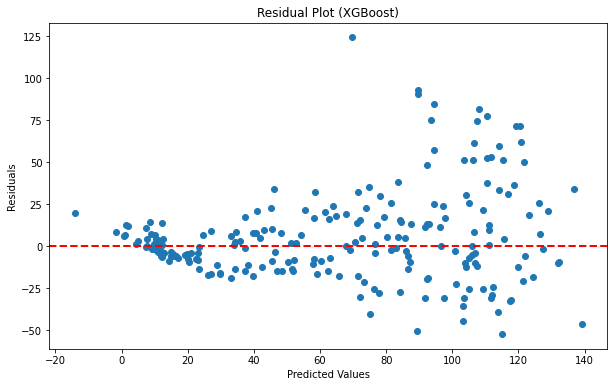

In [55]:
# Step 4: Calculate residuals (difference between actual and predicted values)
residuals = y_test - Y_pred

# Step 5: Plot residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()